In [212]:
import geopandas as gpd
import pandas as pd
import requests
import numpy as np
from matplotlib import pyplot as plt

First, we'll load parcel data for Boston.

In [10]:
boston_properties = gpd.read_file(
    "https://bostonopendata-boston.opendata.arcgis.com/api/download/v1/items/7eea77015412455d9f57790a6388973f/shapefile?layers=0"
)

In [11]:
boston_properties.head()

,OBJECTID,MAP_PAR_ID,LOC_ID,POLY_TYPE,MAP_NO,SOURCE,PLAN_ID,BND_CHK,NO_MATCH,TOWN_ID,last_edite,created_us,created_da,last_edi_1,ShapeSTAre,ShapeSTLen,geometry
0,1,0107062500,F_799998_2955292,FEE,1,ASSESS,None,None,N,35,2019-11-07,None,NaT,None,5.217380e+04,1420.659362,"POLYGON ((800251.826 2955616.543, 800115.183 2..."
1,2,0107069000,F_810842_2942136,FEE,1,ASSESS,None,None,N,35,2019-11-07,None,NaT,None,1.700132e+06,5663.985895,"POLYGON ((811495.739 2942096.043, 811509.717 2..."
2,3,0107073100,F_794811_2942749,FEE,1,ASSESS,None,None,N,35,2019-11-07,None,NaT,None,2.384763e+04,630.899280,"POLYGON ((794879.084 2942822.242, 794876.239 2..."
3,4,0107071000,F_794865_2944326,FEE,1,ASSESS,None,None,N,35,2019-11-07,None,NaT,None,2.042029e+06,6104.038098,"POLYGON ((795380.74 2945013.745, 795613.143 29..."
4,5,0107073000,F_795068_2942368,FEE,1,ASSESS,None,None,N,35,2019-11-07,None,NaT,None,5.066375e+05,2891.186046,"POLYGON ((795218.621 2941997.093, 795204.9 294..."


Data source from [Boston Open Data](https://data.boston.gov/dataset/property-assessment/resource/a9eb19ad-da79-4f7b-9e3b-6b13e66f8285).

In [177]:
!curl -OL https://data.boston.gov/dataset/e02c44d2-3c64-459c-8fe2-e1ce5f38a035/resource/a9eb19ad-da79-4f7b-9e3b-6b13e66f8285/download/fy2024-property-assessment-data_1_5_2024.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1095    0  1095    0     0   5039      0 --:--:-- --:--:-- --:--:--  5022
100 74.6M  100 74.6M    0     0  16.4M      0  0:00:04  0:00:04 --:--:-- 17.5M


In [179]:
boston_assessment = pd.read_csv("fy2024-property-assessment-data_1_5_2024.csv")

/var/folders/_q/g5l2s5950hz1zr9syt43gzp80000gn/T/ipykernel_25111/2846426296.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  boston_assessment = pd.read_csv('fy2024-property-assessment-data_1_5_2024.csv')


In [180]:
boston_assessment.columns

Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'UNIT_NUM', 'CITY',
       'ZIP_CODE', 'BLDG_SEQ', 'NUM_BLDGS', 'LUC', 'LU', 'LU_DESC',
       'BLDG_TYPE', 'OWN_OCC', 'OWNER', 'MAIL_ADDRESSEE',
       'MAIL_STREET_ADDRESS', 'MAIL_CITY', 'MAIL_STATE', 'MAIL_ZIP_CODE',
       'RES_FLOOR', 'CD_FLOOR', 'RES_UNITS', 'COM_UNITS', 'RC_UNITS',
       'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE',
       'SFYI_VALUE', 'TOTAL_VALUE', ' GROSS_TAX ', 'YR_BUILT', 'YR_REMODEL',
       'STRUCTURE_CLASS', 'ROOF_STRUCTURE', 'ROOF_COVER', 'INT_WALL',
       'EXT_FNISHED', 'INT_COND', 'EXT_COND', 'OVERALL_COND', 'BED_RMS',
       'FULL_BTH', 'HLF_BTH', 'KITCHENS', 'TT_RMS', 'BDRM_COND',
       'BTHRM_STYLE1', 'BTHRM_STYLE2', 'BTHRM_STYLE3', 'KITCHEN_TYPE',
       'KITCHEN_STYLE1', 'KITCHEN_STYLE2', 'KITCHEN_STYLE3', 'HEAT_TYPE',
       'HEAT_SYSTEM', 'AC_TYPE', 'FIREPLACES', 'ORIENTATION', 'NUM_PARKING',
       'PROP_VIEW', 'CORNER_UNIT'],
      dtype='object')

In [182]:
boston_assessment.rename(columns={" GROSS_TAX ": "GROSS_TAX"}, inplace=True)

In [185]:
# boston_assessment['TOTAL_VALUE'] = pd.to_numeric(boston_assessment['TOTAL_VALUE'].str.replace(',',''))
boston_assessment["GROSS_TAX"] = pd.to_numeric(
    boston_assessment["GROSS_TAX"]
    .str.replace("[,$--  ]+", "", regex=True)
    .str.replace("\u2007", "")
)
# boston_assessment['YR_BUILT'] = pd.to_numeric(boston_assessment['YR_BUILT'])

In [186]:
boston_assessment[["TOTAL_VALUE", "GROSS_TAX", "YR_BUILT"]].describe()

,TOTAL_VALUE,GROSS_TAX,YR_BUILT
count,1.822420e+05,1.636250e+05,159456.000000
mean,1.529128e+06,1.976172e+04,1933.215665
std,1.441152e+07,2.410204e+05,63.981908
min,0.000000e+00,1.090000e+00,1700.000000
25%,3.875000e+05,5.003460e+03,1900.000000
50%,6.329000e+05,7.366220e+03,1920.000000
75%,9.494000e+05,1.083024e+04,1965.000000
max,2.348210e+09,2.345304e+07,20198.000000


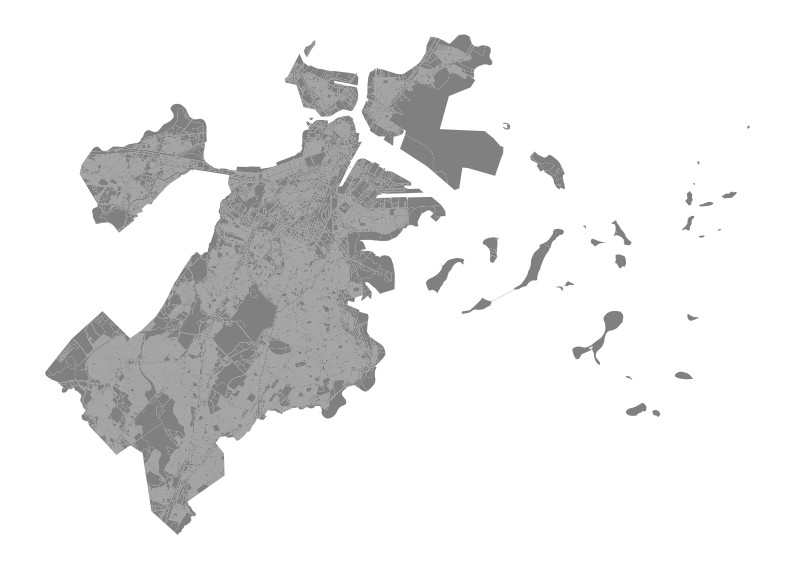

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
boston_properties.plot(ax=ax, facecolor="gray", edgecolor="none")
ax.set_axis_off()
plt.show();

Let's add some additional contextual data. These are boston neighborhoods as approximated by Census tracts.

In [188]:
boston_nhoods = gpd.read_file(
    "https://gis.bostonplans.org/hosting/rest/services/Hosted/Neighborhoods_CT20/FeatureServer/79/query?outFields=*&where=1%3D1&f=geojson"
)

In [189]:
boston_nhoods.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [190]:
boston_properties.crs

<Projected CRS: EPSG:2249>
Name: NAD83 / Massachusetts Mainland (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Massachusetts onshore - counties of Barnstable; Berkshire; Bristol; Essex; Franklin; Hampden; Hampshire; Middlesex; Norfolk; Plymouth; Suffolk; Worcester.
- bounds: (-73.5, 41.46, -69.86, 42.89)
Coordinate Operation:
- name: SPCS83 Massachusetts Mainland zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

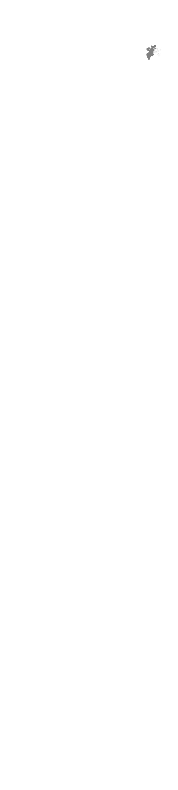

In [191]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
boston_properties.plot(ax=ax, facecolor="gray", edgecolor="none")
boston_nhoods.plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_axis_off()
plt.show();

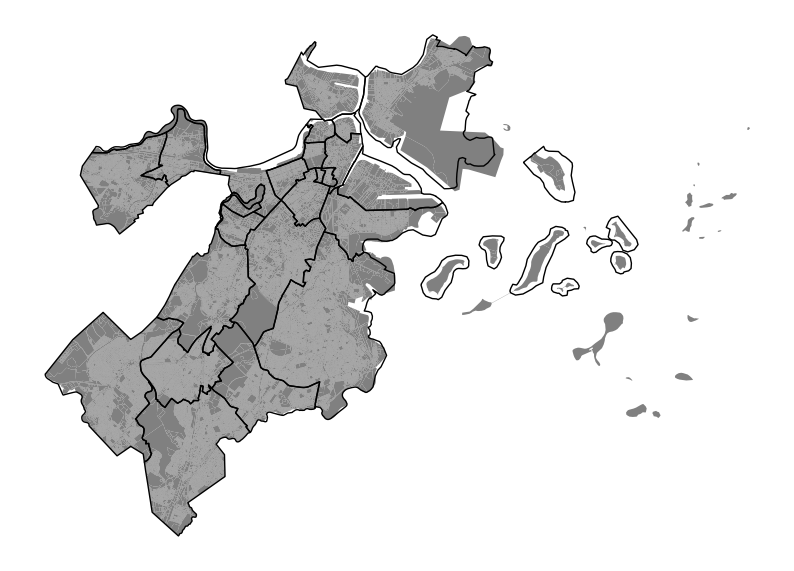

In [192]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
boston_properties.plot(ax=ax, facecolor="gray", edgecolor="none")
# need to reproject
boston_nhoods = boston_nhoods.to_crs(2249)
boston_nhoods.plot(ax=ax, facecolor="none", edgecolor="black")
ax.set_axis_off()
plt.show();

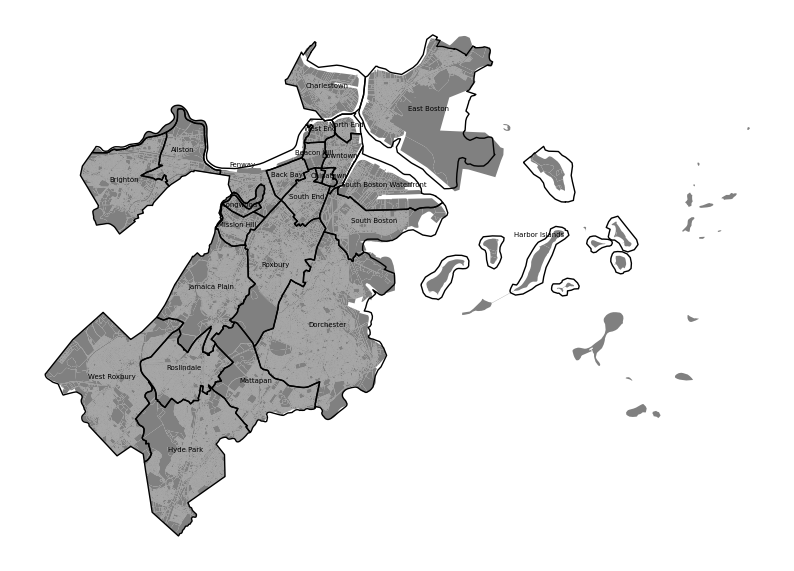

In [193]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
boston_properties.plot(ax=ax, facecolor="gray", edgecolor="none")
boston_nhoods.plot(ax=ax, facecolor="none", edgecolor="black")
boston_nhoods.apply(
    lambda x: ax.annotate(
        text=x["neighborhood"], xy=x.geometry.centroid.coords[0], ha="center", size=5
    ),
    axis=1,
)
ax.set_axis_off()
plt.show();

What if we want to get the assessed data?

In [199]:
boston_assessment["MAP_PAR_ID"] = (
    boston_assessment["GIS_ID"].astype(str).str.pad(10, side="left", fillchar="0")
)

In [200]:
boston_properties_mgd = boston_properties.merge(boston_assessment, on="MAP_PAR_ID")

In [201]:
boston_properties.shape, boston_properties_mgd.shape, boston_assessment.shape

((98845, 17), (182240, 82), (182242, 66))

In [206]:
# let's check why there are duplicates?
boston_assessment["MAP_PAR_ID"].value_counts()

MAP_PAR_ID
0300450000    865
0300475000    848
0304850000    701
0306010010    539
0306455010    462
             ... 
1300106000      1
1300105000      1
1300104000      1
1300103000      1
2205670000      1
Name: count, Length: 98531, dtype: int64

Interestingly, these all look like condos! Because they have the same address. We might still want to keep this information for additional research, but for visualizations it might be easier to summarize this information by parcel.

In [207]:
boston_assessment[boston_assessment["MAP_PAR_ID"] == "0300450000"]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,UNIT_NUM,CITY,ZIP_CODE,BLDG_SEQ,NUM_BLDGS,...,KITCHEN_STYLE3,HEAT_TYPE,HEAT_SYSTEM,AC_TYPE,FIREPLACES,ORIENTATION,NUM_PARKING,PROP_VIEW,CORNER_UNIT,MAP_PAR_ID
18235,300450000,300450000.0,300450000,6.0,Whittier PL,NaN,BOSTON,2114.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300450000
18236,300450002,300450000.0,300450000,6.0,Whittier PL,B-101-6,BOSTON,2114.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300450000
18237,300450004,300450000.0,300450000,6.0,Whittier PL,B-102,BOSTON,2114.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300450000
18238,300450006,300450000.0,300450000,6.0,Whittier PL,B-103,BOSTON,2114.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300450000
18239,300450008,300450000.0,300450000,6.0,Whittier PL,B-104,BOSTON,2114.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19096,300452750,300450000.0,300450000,6.0,Whittier PL,PS-375,BOSTON,2114.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300450000
19097,300452752,300450000.0,300450000,6.0,Whittier PL,PS-376,BOSTON,2114.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300450000
19098,300452754,300450000.0,300450000,6.0,Whittier PL,PS-377,BOSTON,2114.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300450000
19099,300452756,300450000.0,300450000,6.0,Whittier PL,PS-378,BOSTON,2114.0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0300450000


In [231]:
# summarize, and combine
boston_assessment_summary = (
    boston_assessment.groupby("MAP_PAR_ID")[["TOTAL_VALUE", "GROSS_TAX", "YR_BUILT"]]
    .agg([min, np.mean, max])
    .reset_index()
)
boston_assessment_summary.columns = [
    "".join(col).strip() for col in boston_assessment_summary.columns.values
]

/var/folders/_q/g5l2s5950hz1zr9syt43gzp80000gn/T/ipykernel_25111/608564257.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  boston_assessment_summary = boston_assessment.groupby('MAP_PAR_ID')[['TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT']].agg([min, np.mean, max]).reset_index()
/var/folders/_q/g5l2s5950hz1zr9syt43gzp80000gn/T/ipykernel_25111/608564257.py:2: FutureWarning: The provided callable <function mean at 0x1067aa0c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  boston_assessment_summary = boston_assessment.groupby('MAP_PAR_ID')[['TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT']].agg([min, np.mean, max]).reset_index()
/var/folders/_q/g5l2s5950hz1zr9syt43gzp80000gn/T/ipykernel_25111/

In [232]:
boston_assessment_summary

,MAP_PAR_ID,TOTAL_VALUEmin,TOTAL_VALUEmean,TOTAL_VALUEmax,GROSS_TAXmin,GROSS_TAXmean,GROSS_TAXmax,YR_BUILTmin,YR_BUILTmean,YR_BUILTmax
0,0100001000,792000,792000.0,792000,8632.80,8632.80,8632.80,1900.0,1900.0,1900.0
1,0100002000,818200,818200.0,818200,8918.38,8918.38,8918.38,1920.0,1920.0,1920.0
2,0100003000,804400,804400.0,804400,8767.96,8767.96,8767.96,1905.0,1905.0,1905.0
3,0100004000,735300,735300.0,735300,8014.77,8014.77,8014.77,1900.0,1900.0,1900.0
4,0100005000,731600,731600.0,731600,7974.44,7974.44,7974.44,1900.0,1900.0,1900.0
...,...,...,...,...,...,...,...,...,...,...
98526,2205666000,240500,240500.0,240500,NaN,NaN,NaN,NaN,NaN,NaN
98527,2205667000,72800,72800.0,72800,793.52,793.52,793.52,NaN,NaN,NaN
98528,2205668000,1314900,1314900.0,1314900,14332.41,14332.41,14332.41,1920.0,1920.0,1920.0
98529,2205669000,2459200,2459200.0,2459200,62143.98,62143.98,62143.98,1947.0,1947.0,1947.0


In [233]:
boston_properties_mgd = boston_properties.merge(
    boston_assessment_summary, on="MAP_PAR_ID"
)

In [235]:
boston_properties_mgd.shape, boston_properties.shape

((98529, 26), (98845, 17))

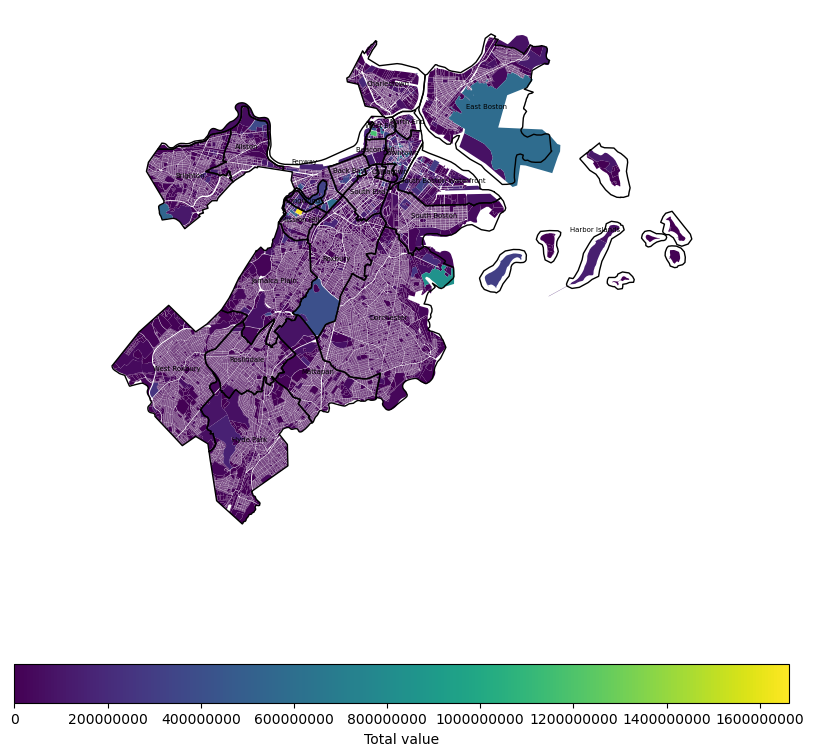

In [259]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
boston_properties_mgd.plot(
    ax=ax,
    column="TOTAL_VALUEmean",
    edgecolor="none",
    legend=True,
    legend_kwds={"label": "Total value", "orientation": "horizontal", "format": "%.0f"},
)
boston_nhoods.plot(ax=ax, facecolor="none", edgecolor="black")
boston_nhoods.apply(
    lambda x: ax.annotate(
        text=x["neighborhood"], xy=x.geometry.centroid.coords[0], ha="center", size=5
    ),
    axis=1,
)
ax.set_axis_off()
plt.show();

In [237]:
boston_properties_mgd["TOTAL_VALUEmean"].quantile(0.1), boston_properties_mgd[
    "TOTAL_VALUEmean"
].quantile(0.9), boston_properties_mgd["TOTAL_VALUEmean"].max()

(np.float64(180600.0),
 np.float64(1812519.9999999981),
 np.float64(1663731638.0))

In [240]:
# let's topcode outliers and drop non-residential properties!
boston_properties_mgd["TOTAL_VALUEmean_topcode"] = np.where(
    boston_properties_mgd["TOTAL_VALUEmean"]
    >= boston_properties_mgd["TOTAL_VALUEmean"].quantile(0.9),
    boston_properties_mgd["TOTAL_VALUEmean"].quantile(0.9),
    boston_properties_mgd["TOTAL_VALUEmean"],
)

In [254]:
boston_res = boston_assessment[
    boston_assessment["LU"].isin(["R3", "R2", "R1", "R4", "RC", "RL - RL"])
]
boston_res_ids = boston_res["MAP_PAR_ID"].unique()

boston_res_mgd = boston_properties_mgd[
    boston_properties_mgd["MAP_PAR_ID"].isin(boston_res_ids)
]

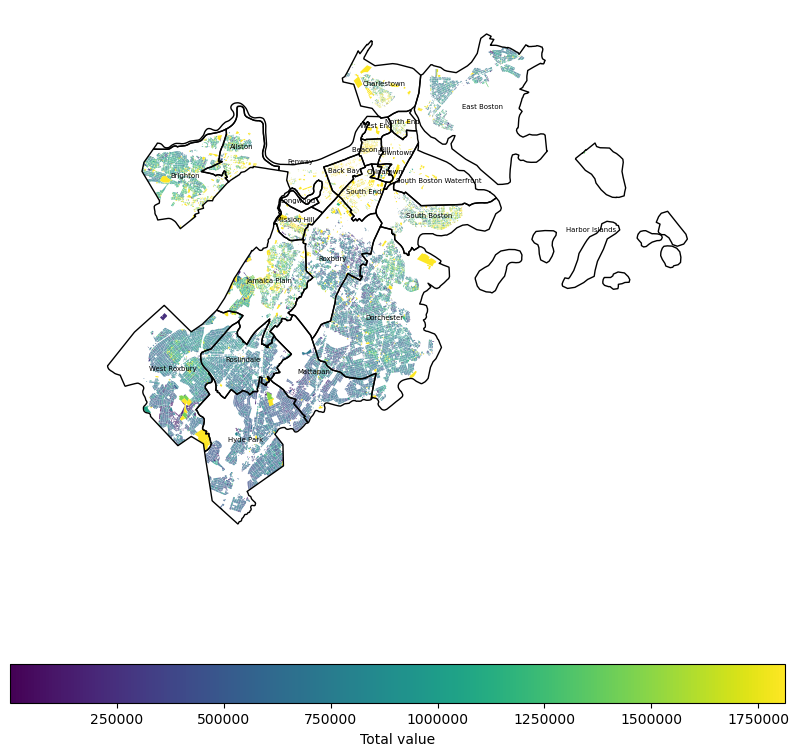

In [258]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
boston_res_mgd.plot(
    ax=ax,
    column="TOTAL_VALUEmean_topcode",
    edgecolor="none",
    legend=True,
    legend_kwds={"label": "Total value", "orientation": "horizontal", "format": "%.0f"},
)
boston_nhoods.plot(ax=ax, facecolor="none", edgecolor="black")
boston_nhoods.apply(
    lambda x: ax.annotate(
        text=x["neighborhood"], xy=x.geometry.centroid.coords[0], ha="center", size=5
    ),
    axis=1,
)
ax.set_axis_off()
plt.show();

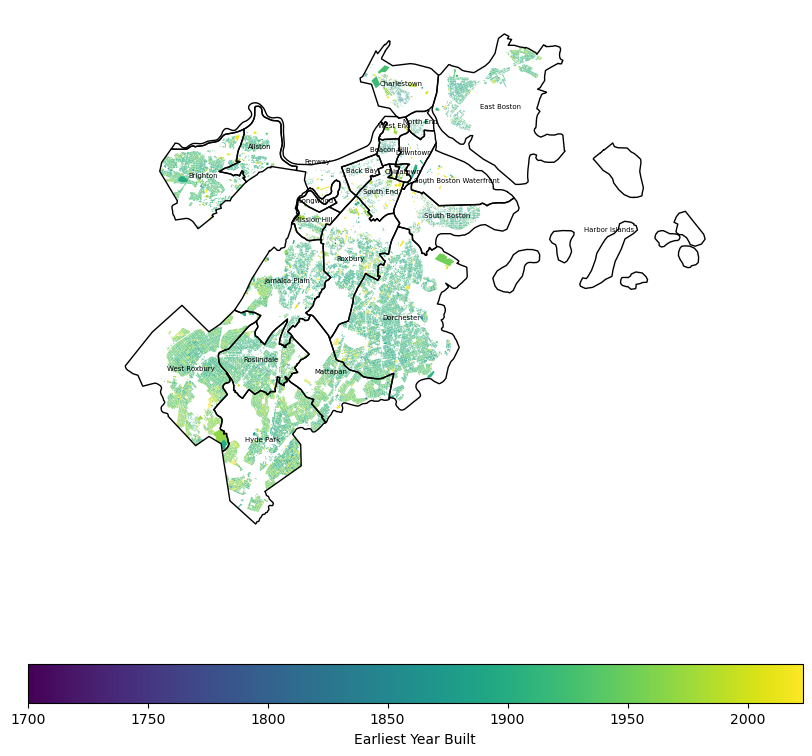

In [260]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
boston_res_mgd.plot(
    ax=ax,
    column="YR_BUILTmin",
    edgecolor="none",
    legend=True,
    legend_kwds={
        "label": "Earliest Year Built",
        "orientation": "horizontal",
        "format": "%.0f",
    },
)
boston_nhoods.plot(ax=ax, facecolor="none", edgecolor="black")
boston_nhoods.apply(
    lambda x: ax.annotate(
        text=x["neighborhood"], xy=x.geometry.centroid.coords[0], ha="center", size=5
    ),
    axis=1,
)
ax.set_axis_off()
plt.show();

In [268]:
# let's do a spatial join to get this information at the neighborhood level
boston_res_centroid = boston_res_mgd.assign(geometry=boston_res_mgd.geometry.centroid)
boston_res_sjoin = boston_res_centroid.sjoin(boston_nhoods)

In [269]:
boston_res_sjoin.shape, boston_res_mgd.shape

((72093, 30), (72095, 27))

In [276]:
boston_res_nhood_summary = boston_res_sjoin.groupby(["neighborhood"], as_index=False)[
    ["TOTAL_VALUEmean_topcode", "GROSS_TAXmean"]
].mean()

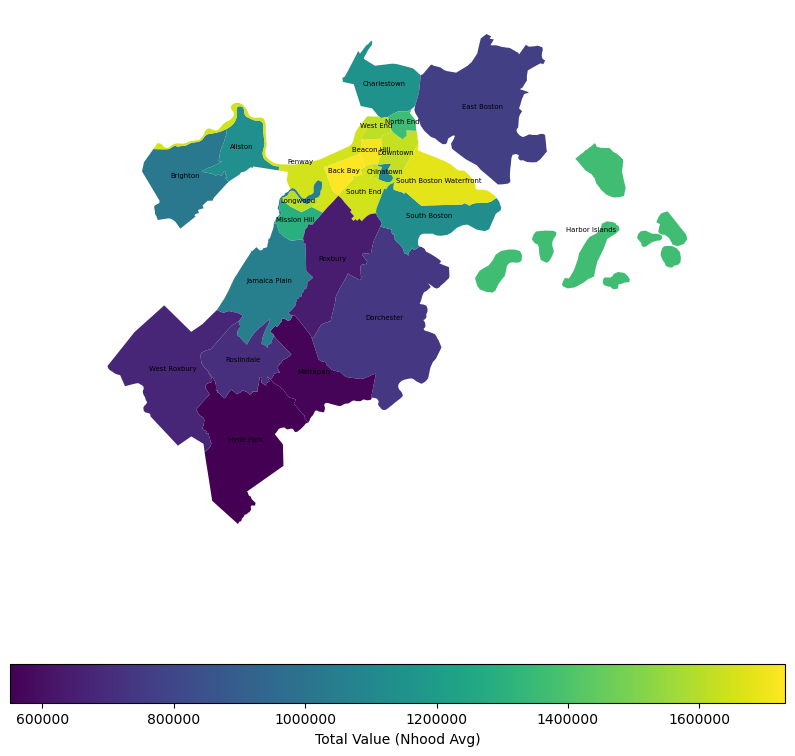

In [282]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
boston_nhoods.merge(boston_res_nhood_summary, on="neighborhood").plot(
    ax=ax,
    column="TOTAL_VALUEmean_topcode",
    legend=True,
    legend_kwds={
        "label": "Total Value (Nhood Avg)",
        "orientation": "horizontal",
        "format": "%.0f",
    },
)
boston_nhoods.apply(
    lambda x: ax.annotate(
        text=x["neighborhood"], xy=x.geometry.centroid.coords[0], ha="center", size=5
    ),
    axis=1,
)
ax.set_axis_off()
plt.show();